## Chapter8 클래스 불균형 처리

데이터 수준
+ 데이터 세트의 균형을 맞추기 위해 리샘플링 기술(언더 샘플링 or 오버 샘플링)을 적용

알고리즘 수준
+ 각 클래스의 train data 의 size 에 따라 가중 비용을 조정하여 수행
+ ex) SVM의 C 값의 설정 및 의사결정 나무의 가중치 등
+ 딥러닝의 Weight balancing

### 8.1 언더샘플링
+ 다수 클래스의 샘플을 소수 클래스의 분포 비율과 일치하도록 무작위로 제거함
+ 2개의 클래스의 비율을 맞추기 위해 중요한 정보를 잃어버리고 편향될 수 있기 때문에 작은 데이터에서는 선호되지 않음
+ 오버 샘플링보다 비용이 더 적게 듬
+ 다수의 부정적인 클래스 일부를 줄이는 것이 허용됨
+ 긍정 클래스의 정보가 많다면 언더샘플링을 하는 경향이 있음

#### 8.1.1 언더샘플링 실습

In [8]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
credit = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/credit_final.csv')
X = credit.drop(['credit.rating'], axis = 1)
y = credit['credit.rating']

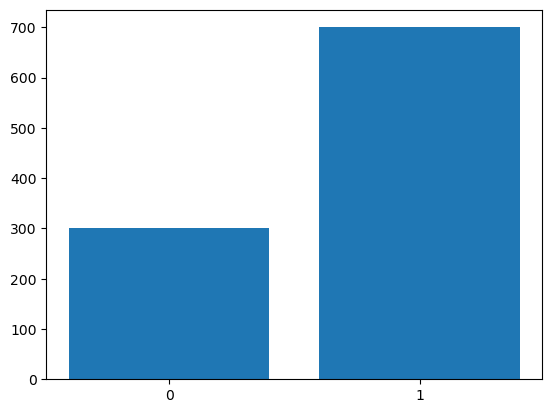

In [9]:
import matplotlib.pyplot as plt
plt.bar(y.value_counts().index, y.value_counts().values)
plt.xticks(y.value_counts().index)
plt.show()

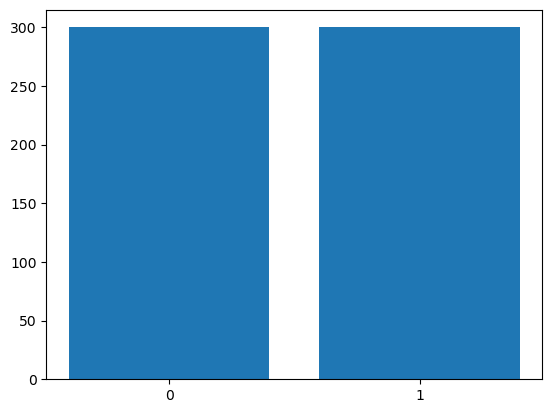

In [20]:
from imblearn.under_sampling import RandomUnderSampler
X_resampled, y_resampled = RandomUnderSampler(random_state=42).fit_resample(X, y)

plt.bar(y_resampled.value_counts().index, y_resampled.value_counts().values)
plt.xticks(y_resampled.value_counts().index)
plt.show()

roc_auc score : 0.7847619047619048


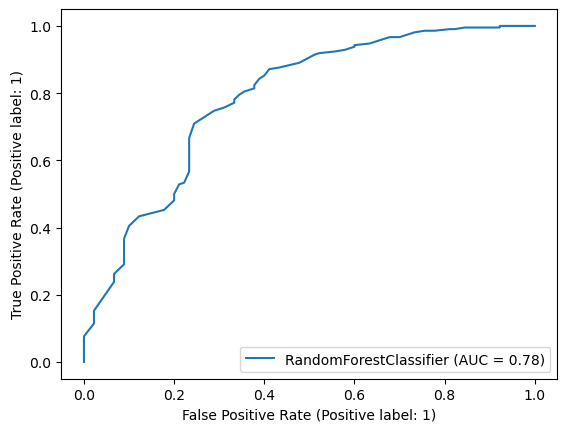

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RocCurveDisplay.from_estimator(rf_clf, X_test, y_test)
print('roc_auc score :', roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1]))

roc_auc score : 0.7809876543209877


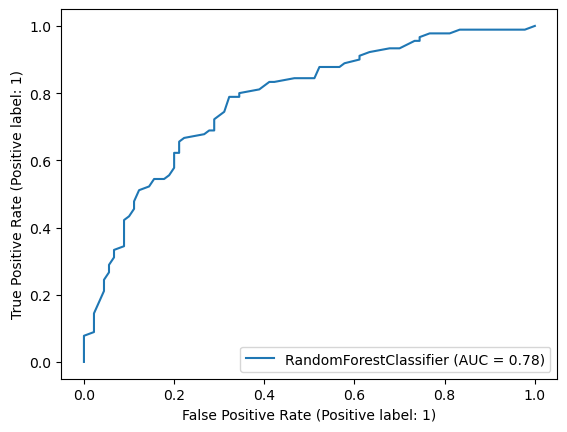

In [24]:
X_re_train, X_re_test, y_re_train, y_re_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)


rf_clf = RandomForestClassifier()
rf_clf.fit(X_re_train, y_re_train)

RocCurveDisplay.from_estimator(rf_clf, X_re_test, y_re_test)
print('roc_auc score :', roc_auc_score(y_re_test, rf_clf.predict_proba(X_re_test)[:, 1]))

### 8.2 오버샘플링
+ 소수 클래스의 샘플을 증가시켜 마이너 클래스와 메이저 클래스의 샘플 크기를 동일하게 만드는 기법
+ 랜덤 오버샘플링(소수 샘플 복제)은 동일한 정보를 복사하여 오버피팅을 유발할 수 있음

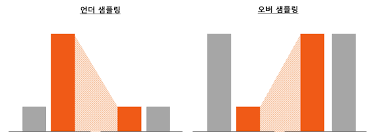

#### 8.2.2 오버샘플링 실습

(700, 20) (700,)
(980, 20) (980,)


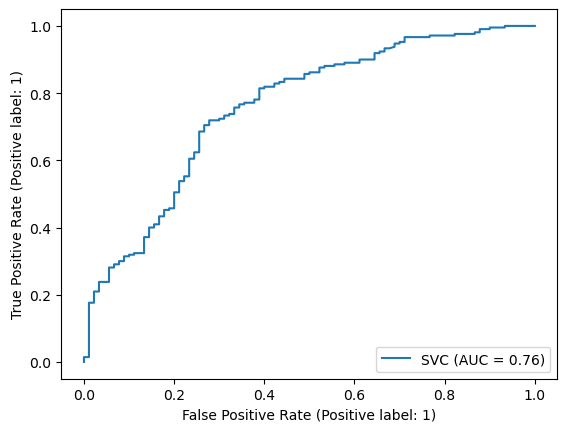

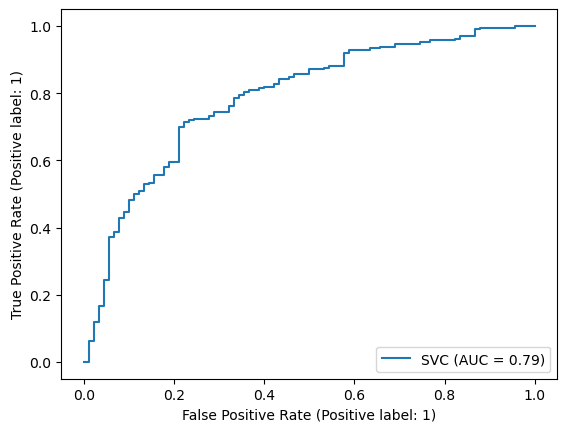

In [36]:
import pandas as pd
credit = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/credit_final.csv')
X = credit.drop(['credit.rating'], axis = 1)
y = credit['credit.rating']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# 오버샘플링
from imblearn.over_sampling import KMeansSMOTE

sm = KMeansSMOTE(k_neighbors=3)

# train 데이터를 넣어 복제함
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

print(X_train.shape, y_train.shape)
print(X_resampled.shape, y_resampled.shape)

# 분류 모델
from sklearn.svm import SVC
svc1 = SVC(C=20, gamma=0.1, probability=True)
svc1.fit(X_train, y_train)

svc2 = SVC(C=20, gamma=0.1, probability=True)
svc2.fit(X_resampled, y_resampled)

RocCurveDisplay.from_estimator(svc1, X_test, y_test)
RocCurveDisplay.from_estimator(svc2, X_test, y_test)
plt.show()

### 8.3 불균형 데이터 처리 실습

__업 샘플링 과정 설명하고 결과 작성__
> 데이터 세트의 균형을 맞추기 위해 업 샘플링을 적용한다.  
대표적으로 KNN을 이용한 SMOTE 기법이 있다.  
SMOTE은 KNN을 이용하여 최근접 이웃의 거리 계산을 통해 K개의 중간 지점의 데이터를 생성한다. 오버피팅을 막을 수 있으나 새로운 데이터나 작은 데이터셋에서 사용하기 어렵다.


__언더 샘플링 과정 설명하고 결과 작성__
> 다수의 데이터를 소수 데이터 크기에 맞추는 기법이다.  
랜덤 샘플링을 통해 소수의 클래스로 만드는 과정에서 데이터의 손실이 발생하는 문제가 있다. 소수 클래스의 크기가 너무 작으면 과소적합이 발생할 수 있다.


__둘 중 선택하고 이유 설명__
> 간단하게 RandomForestClassifier 에 데이터를 학습시켜본 결과 오버샘플링 기법 SMOTE 이 언더샘플링 기법보다 더 좋은 결과를 도출했기 때문에 오버 샘플링을 선택한다.

In [56]:
import pandas as pd
credit = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/credit_final.csv')
X = credit.drop(['credit.rating'], axis = 1)
y = credit['credit.rating']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, random_state= 42, test_size=0.3)
# scaler = MinMaxScaler()
# X_train =scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

# 그냥 학습
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
print('훈련 셋 shape :',X_train.shape, y_train.shape)
rf_clf1 = RandomForestClassifier()
rf_clf1.fit(X_train, y_train)
print('normal roc_auc_score :', roc_auc_score(y_test, rf_clf1.predict_proba(X_test)[:, 1]))

# 오버샘플링
from imblearn.over_sampling import RandomOverSampler
X_over_train, y_over_train = RandomOverSampler().fit_resample(X_train, y_train)
print('훈련 셋 shape',X_over_train.shape, y_over_train.shape)
rf_clf2 = RandomForestClassifier()
rf_clf2.fit(X_over_train, y_over_train)
print('over roc_auc_score :', roc_auc_score(y_test, rf_clf2.predict_proba(X_test)[:, 1]))

# 언더샘플링

from imblearn.under_sampling import RandomUnderSampler
X_under_train, y_under_train = RandomUnderSampler().fit_resample(X_train, y_train)
print('훈련 셋 shape',X_under_train.shape, y_under_train.shape)
rf_clf3 = RandomForestClassifier()
rf_clf3.fit(X_under_train, y_under_train)
print('under roc_auc_score :', roc_auc_score(y_test, rf_clf3.predict_proba(X_test)[:, 1]))


훈련 셋 shape : (700, 20) (700,)
normal roc_auc_score : 0.7812698412698412
훈련 셋 shape (980, 20) (980,)
over roc_auc_score : 0.7837037037037037
훈련 셋 shape (420, 20) (420,)
under roc_auc_score : 0.771957671957672
